# BLOSSOM BANK ONLINE PAYMENT FRAUD DETECTION


### INTRODUCTION 

Blossom Bank also known as BB PLC is a multinational financial services group, that offers retail and investment banking, pension management, asset management and payments services, headquartered in London, UK. 

### Problem Statement

The digitalization of financial procedures and systems has facilitated the increase in online payment fraud which continues to lead to loss of revenue for financial institutions. As a financial organization, Blossom bank needs to be able to identify fraudulent activities so as to increase its revenue and protect the interest of its customers. This project is aimed at building a machine learning model that will help Blossom bank identify fraudulent online payments, stop such transactions, increase its revenue and maintain customer loyalty.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Inspection

In [2]:
OPFD = pd.read_csv('online payment fraud detection.csv')

In [3]:
OPFD.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


**Features in the dataset and their meaning**
- **step**: represents a unit of time where 1 step equals 1 hour 
- **type**: type of online transaction 
- **amount**: the amount of the transaction 
- **nameOrig**: customer starting the transaction 
- **oldbalanceOrg**: balance before the transaction
- **newbalanceOrig**: balance after the transaction
- **nameDest**: recipient of the transaction 
- **oldbalanceDest**: initial balance of recipient before the transaction 
- **newbalanceDest**: the new balance of the recipient after the transaction 
- **isFraud**: fraud transaction


In [4]:
OPFD.shape

(1048575, 10)

In [5]:
OPFD.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [6]:
OPFD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [7]:
OPFD.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

**From inspection, it was dicovered that:**
1. There are 1048575 rows and 10 columns
2. The dataset has 0 null values 

### Data Cleansing

In [8]:
#making a copy of the original dataset
OPFD_1 = OPFD.copy()

In [9]:
OPFD_1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [10]:
#renaming columns
OPFD_1.rename(columns = {'step':'Number_of_Hours', 'type':'Transaction_type',
                              'amount':'Amount', 'nameOrig':'Name(Sender)', 'oldbalanceOrg':'Sender_old_bal', 'newbalanceOrig':'Sender_new_bal', 'nameDest':'Name(Recipient)', 'oldbalanceDest':'Recipient_old_bal', 'newbalanceDest':'Recipient_new_bal', 'isFraud':'Fraud'}, inplace = True)

In [11]:
OPFD_1.head()

,Number_of_Hours,Transaction_type,Amount,Name(Sender),Sender_old_bal,Sender_new_bal,Name(Recipient),Recipient_old_bal,Recipient_new_bal,Fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [12]:
#checking data types after renaming columns
OPFD_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Number_of_Hours    1048575 non-null  int64  
 1   Transaction_type   1048575 non-null  object 
 2   Amount             1048575 non-null  float64
 3   Name(Sender)       1048575 non-null  object 
 4   Sender_old_bal     1048575 non-null  float64
 5   Sender_new_bal     1048575 non-null  float64
 6   Name(Recipient)    1048575 non-null  object 
 7   Recipient_old_bal  1048575 non-null  float64
 8   Recipient_new_bal  1048575 non-null  float64
 9   Fraud              1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [13]:
#checking for unique values
for col in OPFD_1:
    print(OPFD_1[col].nunique())

95
5
1009606
1048317
391033
440792
449635
590110
437054
2


In [14]:
OPFD_1.head()

,Number_of_Hours,Transaction_type,Amount,Name(Sender),Sender_old_bal,Sender_new_bal,Name(Recipient),Recipient_old_bal,Recipient_new_bal,Fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [15]:
OPFD_1.describe()

,Number_of_Hours,Amount,Sender_old_bal,Sender_new_bal,Recipient_old_bal,Recipient_new_bal,Fraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


### Data Visualization 

### UNIVARIATE ANALYSIS

Text(0.5, 1.0, 'Number of hours')

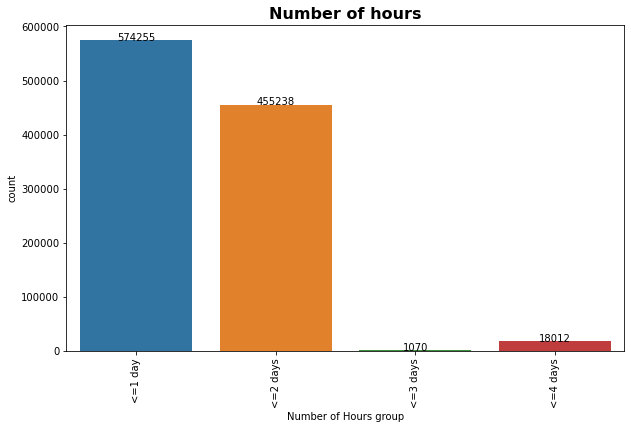

In [16]:
# create a function to group the transaction amount
def numberOfHoursGroup(Number_of_Hours):
    if Number_of_Hours <= 24:
        return "<=1 day"
    elif Number_of_Hours <=48:
        return "<=2 days"
    elif Number_of_Hours <=72:
        return "<=3 days"
    elif Number_of_Hours <= 96:
        return "<=4 days"
    else: 
        return ">4 days)"

    
# Create a new column for number of hours
OPFD_1["Number of Hours group"] = OPFD_1["Number_of_Hours"].apply(numberOfHoursGroup)


# Display values for each category
fig, ax1 = plt.subplots(figsize = (10,6))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "Number of Hours group", data = OPFD_1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Number of hours', weight='bold', fontsize=16)

This plot shows that the most transactions were done within 1 day while few transactions took up to 3 days

Text(0, 0.5, 'Count of Transaction type')

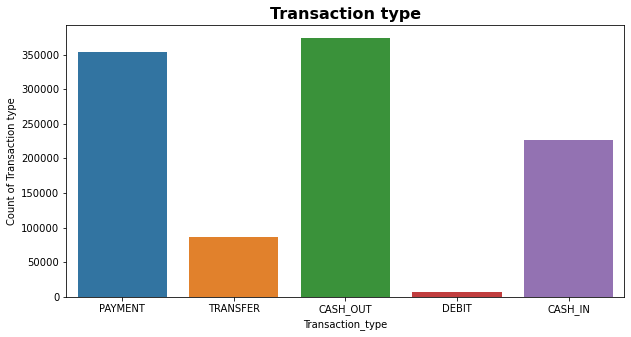

In [17]:
plt.figure(figsize=(10,5))

sns.countplot(x='Transaction_type', data=OPFD_1)
plt.title('Transaction type', weight='bold', fontsize=16)
plt.xlabel('Transaction_type')
plt.ylabel('Count of Transaction type')

This shows that Cash out transaction is the highest occuring transaction while Debit transaction is the lowest.

Text(0.5, 1.0, 'Transaction Amount')

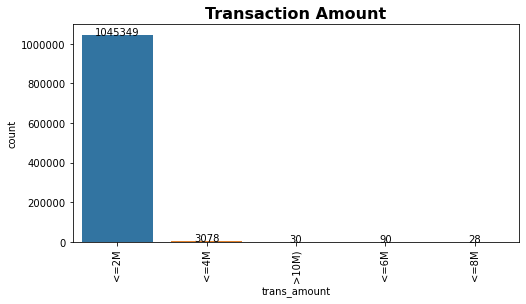

In [18]:
# create a function to group the transaction amount
def amt(Amount):
    if Amount <= 2000000:
        return "<=2M"
    elif Amount <=4000000:
        return "<=4M"
    elif Amount <=6000000:
        return "<=6M"
    elif Amount <= 8000000:
        return "<=8M"
    else: 
        return ">10M)"

    
# Create a new column for age category
OPFD_1["trans_amount"] = OPFD_1["Amount"].apply(amt)


# Display values for each category
fig, ax1 = plt.subplots(figsize = (8,4))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "trans_amount", data = OPFD_1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Transaction Amount', weight='bold', fontsize=16)

From this, it is evident that the highest transaction amount is less than or equal to 2million and the lowest transaction amount is less than or equal to 8million.

In [19]:
OPFD_1.Sender_old_bal.max()

38900000.0

In [20]:
OPFD_1.Sender_old_bal.min()

0.0

Text(0.5, 1.0, "Sender's old bal")

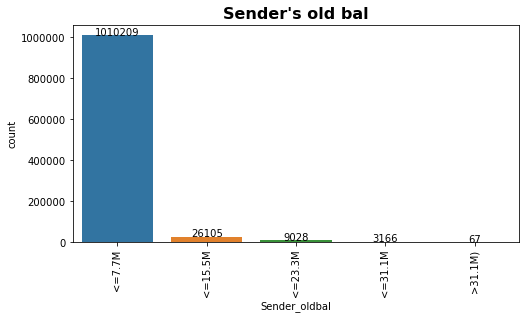

In [21]:
# create a function to group the Sender's old balance
def senderOldBal(Sender_old_bal):
    if Sender_old_bal <= 7700000:
        return "<=7.7M"
    elif Sender_old_bal <=15500000:
        return "<=15.5M"
    elif Sender_old_bal <=23300000:
        return "<=23.3M"
    elif Sender_old_bal <=31100000:
        return "<=31.1M"
    else: 
        return ">31.1M)"

    
# Create a new column for age category
OPFD_1["Sender_oldbal"] = OPFD_1["Sender_old_bal"].apply(senderOldBal)


# Display values for each category
fig, ax1 = plt.subplots(figsize = (8,4))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "Sender_oldbal", data = OPFD_1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title("Sender's old bal",weight='bold', fontsize=16)

Most senders had less than or exactly 7.7million in their account before any transaction while senders who had greater than 31.1million before a transaction are the lowest.

Text(0.5, 1.0, "Sender's new bal")

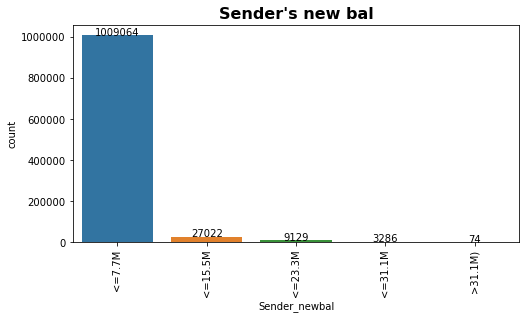

In [22]:
# create a function to group the Sender's new balance
def senderNewBal(Sender_new_bal	):
    if Sender_new_bal <= 7700000:
        return "<=7.7M"
    elif Sender_new_bal <=15500000:
        return "<=15.5M"
    elif Sender_new_bal <=23300000:
        return "<=23.3M"
    elif Sender_new_bal <=31100000:
        return "<=31.1M"
    else: 
        return ">31.1M)"

    
# Create a new column for Sender's new balance category
OPFD_1["Sender_newbal"] = OPFD_1["Sender_new_bal"].apply(senderNewBal)


# Display values for each category
fig, ax1 = plt.subplots(figsize = (8,4))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "Sender_newbal", data = OPFD_1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title("Sender's new bal", weight='bold', fontsize=16)

The number of senders with a balance of less than or exactly 7.7million after a transaction were the highest while  the number of senders with a balance of less than or equals to 31.1 million were the least.

Text(0.5, 1.0, "Recipient's old bal")

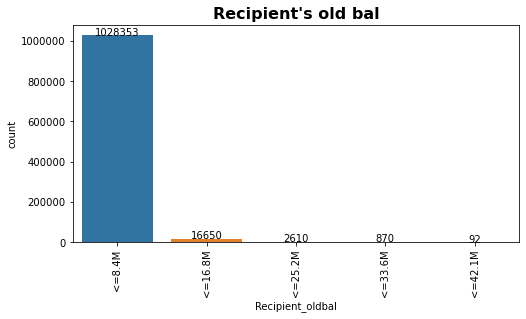

In [23]:
# create a function to group the Recipient's old balance
def recipientOldBal(Recipient_old_bal):
    if Recipient_old_bal <= 8400000:
        return "<=8.4M"
    elif Recipient_old_bal <=16800000:
        return "<=16.8M"
    elif Recipient_old_bal <=25200000:
        return "<=25.2M"
    elif Recipient_old_bal <=33600000:
        return "<=33.6M"
    elif Recipient_old_bal <=42100000:
        return "<=42.1M"
    else: 
        return ">42.1M)"

    
# Create a new column for Recipient's old balance category
OPFD_1["Recipient_oldbal"] = OPFD_1["Recipient_old_bal"].apply(recipientOldBal)


# Display values for each category
fig, ax1 = plt.subplots(figsize = (8,4))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "Recipient_oldbal", data = OPFD_1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title("Recipient's old bal", weight='bold', fontsize=16)

Before a transaction the highest category of recipients had less than or equal to 8.4 million in their account while the least category had less than or exactly 42.1 million.

Text(0.5, 1.0, "Recipient's new bal")

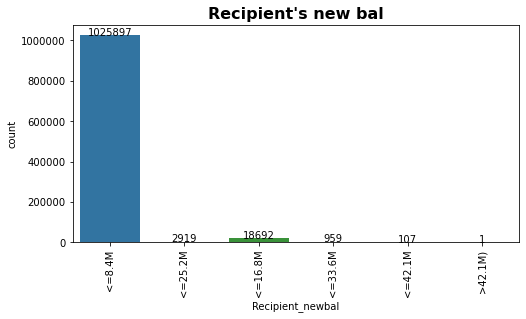

In [24]:
# create a function to group the Recipient's new balance
def recipientNewBal(Recipient_new_bal):
    if Recipient_new_bal <= 8400000:
        return "<=8.4M"
    elif Recipient_new_bal <=16800000:
        return "<=16.8M"
    elif Recipient_new_bal <=25200000:
        return "<=25.2M"
    elif Recipient_new_bal <=33600000:
        return "<=33.6M"
    elif Recipient_new_bal <=42100000:
        return "<=42.1M"
    else: 
        return ">42.1M)"

    
# Create a new column for Recipient's new balance category
OPFD_1["Recipient_newbal"] = OPFD_1["Recipient_new_bal"].apply(recipientNewBal)


# Display values for each category
fig, ax1 = plt.subplots(figsize = (8,4))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "Recipient_newbal", data = OPFD_1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title("Recipient's new bal", weight='bold', fontsize=16)

After a transaction the highest category of recipients had less than or equal to 8.4 million in their account while only one sender had greater than 42.1 million.

Text(0.5, 1.0, 'Fraudulent Transaction')

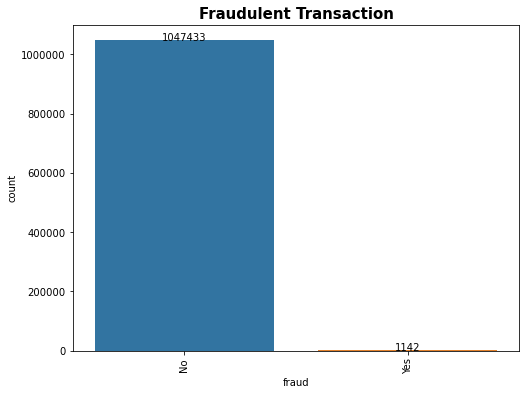

In [25]:
# (1=fraud, 0=not fraud)

# Create Function that categorise Fraud
def fraud(Fraud):
    if Fraud == 1:
        return 'Yes'
    else:
        return 'No'
    
OPFD_1['fraud'] = OPFD_1['Fraud'].apply(fraud)

# Visualize fraud column
fig, ax1 = plt.subplots(figsize = (8,6))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "fraud", data = OPFD_1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Fraudulent Transaction', weight='bold', fontsize=15)


Most transactions were not fradulent transactions.

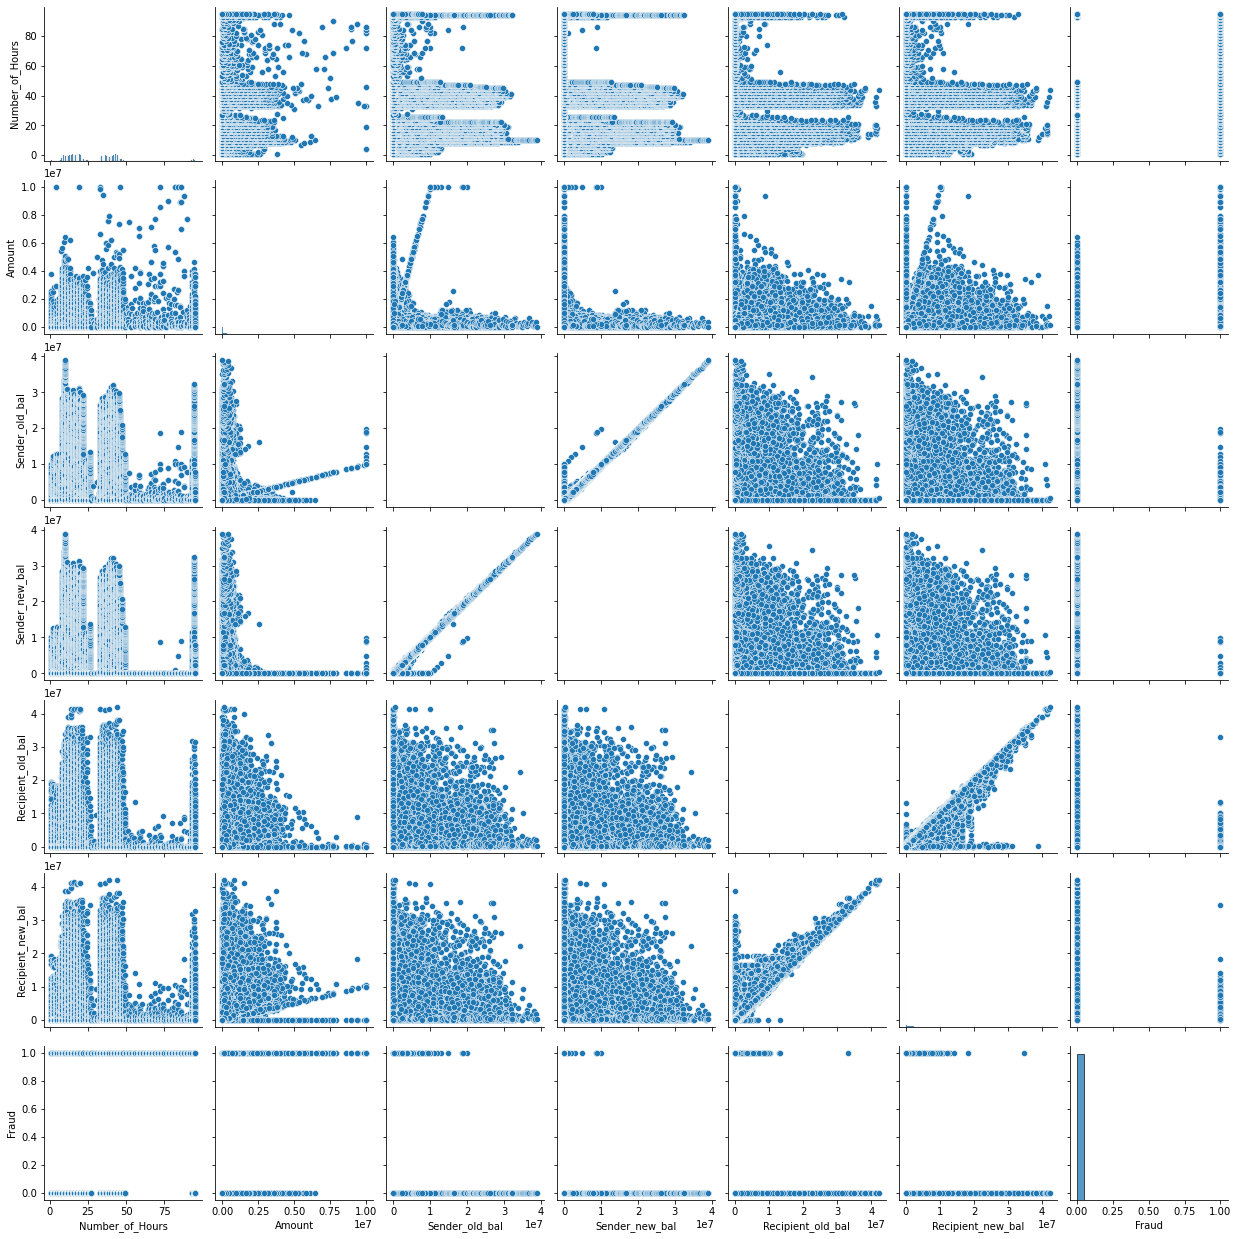

In [26]:
sns.pairplot(OPFD_1)

### BIVARIATE ANALYSIS

In [27]:
OPFD_1.head()

,Number_of_Hours,Transaction_type,Amount,Name(Sender),Sender_old_bal,Sender_new_bal,Name(Recipient),Recipient_old_bal,Recipient_new_bal,Fraud,Number of Hours group,trans_amount,Sender_oldbal,Sender_newbal,Recipient_oldbal,Recipient_newbal,fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,<=1 day,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,No
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,<=1 day,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,No
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,<=1 day,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Yes
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,<=1 day,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Yes
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,<=1 day,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,No


Text(0.5, 1.0, 'Transaction Type vs Transaction Amount')

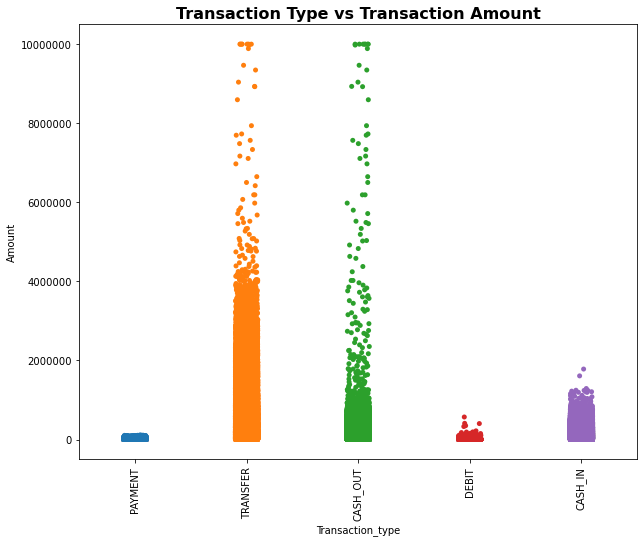

In [28]:
#transaction type vs transaction amount 
fig, ax1 = plt.subplots(figsize = (10,8))
plt.ticklabel_format(style='plain')
viz = sns.stripplot(ax=ax1, x = 'Transaction_type', y = 'Amount', data=OPFD_1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha='center')
plt.title('Transaction Type vs Transaction Amount', weight='bold', fontsize=16)
    


This shows that transactions involving Transfer involved the highest amounts.

Text(0.5, 1.0, 'Transaction type vs Number of Hours')

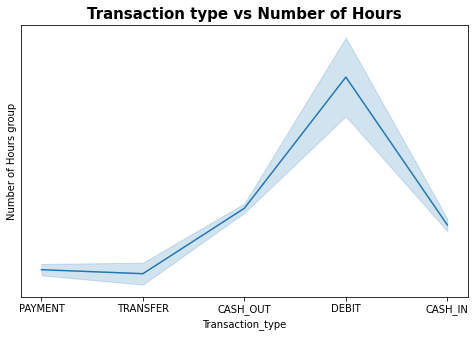

In [29]:
# Transaction type vs number of hours
fig, ax1 = plt.subplots(figsize = (8,5))
sns.lineplot(ax =ax1, x = "Transaction_type", y= 'Number of Hours group', data = OPFD_1)
plt.title('Transaction type vs Number of Hours', weight='bold', fontsize=15)

Debit transactions took the longest duration 

Text(0, 0.5, 'Count')

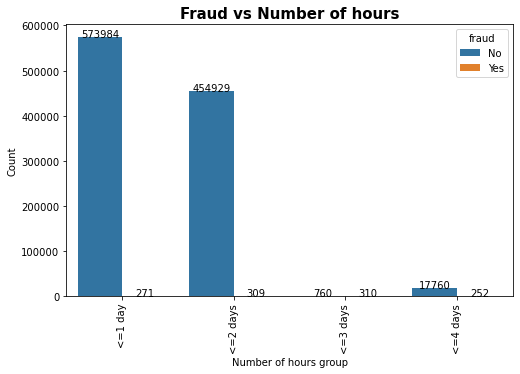

In [30]:
# Fraud vs Number of hours
plt.figure(figsize=(8,5))
plt.title('Fraud vs Number of hours', weight='bold', fontsize=15)
plt.ticklabel_format(style='plain')
viz = sns.countplot(x='Number of Hours group', data=OPFD_1, hue='fraud')
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.xlabel('Number of hours group')
plt.ylabel('Count')

Fraudulent transactions ocurred the most when transactions took less than or exactly 2 and 3 days

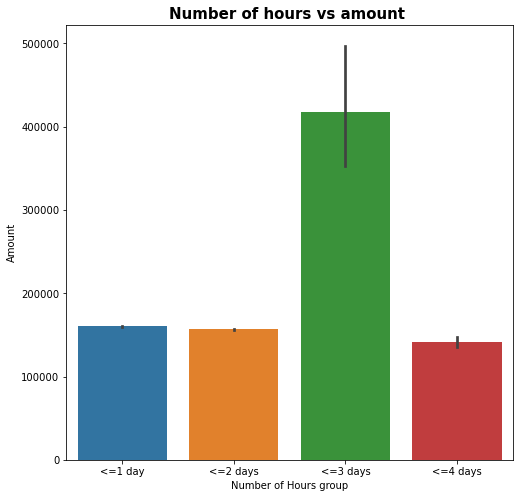

In [31]:
#number of hours vs amount 
fig, ax1 = plt.subplots(figsize = (8,8))
plt.ticklabel_format(style='plain')
plt.title('Number of hours vs amount ', weight='bold', fontsize=15)
viz = sns.barplot(ax =ax1, x = 'Number of Hours group', y= 'Amount', data = OPFD_1)


The largest amounts took less than or exactly 3 days i.e. the larger the amount, the longer the duration. 

Text(0.5, 1.0, 'Fraud vs Amount')

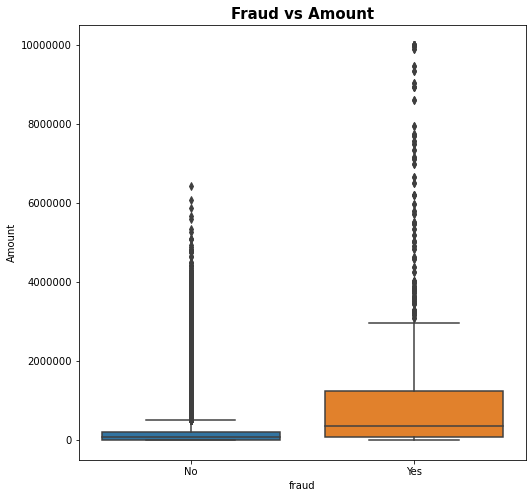

In [32]:
#fraud vs amount
fig, ax1 = plt.subplots(figsize = (8,8))
plt.ticklabel_format(style='plain')
viz = sns.boxplot(ax =ax1, x = "fraud", y= 'Amount', data = OPFD_1)
plt.title('Fraud vs Amount', weight='bold', fontsize=15)

This shows that fraudulent transactions involved the highest amount of money i.e. the larger the amount, the more likely the transaction is fradulent

### MULTIVARIATE ANALYSIS

Text(0.5, 1.0, 'Transaction amount vs number of hours  group')

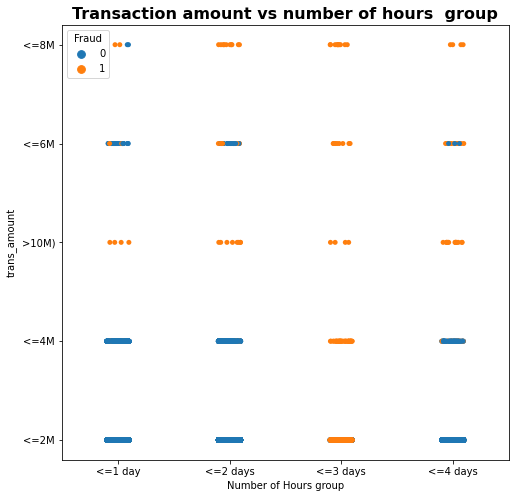

In [33]:
plt.figure(figsize=(8,8))
sns.stripplot(y='trans_amount', x= 'Number of Hours group', hue = 'Fraud', data = OPFD_1)
plt.title( 'Transaction amount vs number of hours  group', weight = 'bold', fontsize = 16)

Transactions that took the highest number of hours involved the largest amounts and were tagged fraudulent. 

In [34]:
OPFD_1['Number of Hours group'].value_counts()

<=1 day     574255
<=2 days    455238
<=4 days     18012
<=3 days      1070
Name: Number of Hours group, dtype: int64

Text(0.5, 1.0, 'Amount vs Transaction type vs fraud')

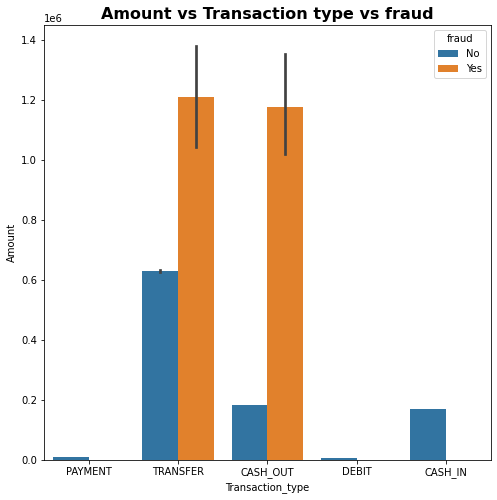

In [35]:
plt.figure(figsize=(8,8))
sns.barplot(y='Amount', x= 'Transaction_type', hue = 'fraud', data = OPFD_1)
plt.title( 'Amount vs Transaction type vs fraud', weight = 'bold', fontsize = 16)

Transfer involved the highest amounts and were tagged fraud. Cash out transactions ranked second as fraudulent transactions involving large amounts as well.

<AxesSubplot:>

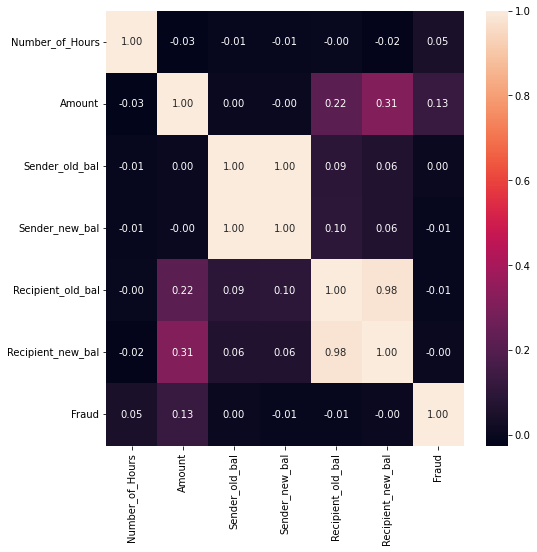

In [36]:
#Correlation
corel = OPFD_1.corr()
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(corel, annot=True, fmt='.2f')

- there is a low positive correlation between amount and recipient new balance, recipient old balance and amount 
- there is a low positive correlation between amount and fraud
- there is a high positive correlation between recipient old balance and recipient new balance
- there is a high positive correlation between sender old balance and sender new balance 

In [37]:
OPFD_1.corr()

,Number_of_Hours,Amount,Sender_old_bal,Sender_new_bal,Recipient_old_bal,Recipient_new_bal,Fraud
Number_of_Hours,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030
Amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
Sender_old_bal,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
Sender_new_bal,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
Recipient_old_bal,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
Recipient_new_bal,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
Fraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


### SUMMARY OF FINDINGS

- the largest amounts took longer days and were tagged fraudulent transactions 
- transaction types: transfer and cash out involved the largest amounts and were the most fraudulent transactions
- cash outs were the most occuring transactions 

## Modelling

### Select target

In [38]:
y = OPFD_1['Fraud']

In [39]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: Fraud, dtype: int64

In [40]:
OPFD_1.head()

,Number_of_Hours,Transaction_type,Amount,Name(Sender),Sender_old_bal,Sender_new_bal,Name(Recipient),Recipient_old_bal,Recipient_new_bal,Fraud,Number of Hours group,trans_amount,Sender_oldbal,Sender_newbal,Recipient_oldbal,Recipient_newbal,fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,<=1 day,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,No
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,<=1 day,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,No
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,<=1 day,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Yes
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,<=1 day,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Yes
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,<=1 day,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,No


In [41]:
OPFD_1['Fraud'] = (OPFD_1['Fraud'] == 'yes').astype(int)

In [42]:
#one hot encode the categorical column using pd.get_dummies()
category_dummies = pd.get_dummies(OPFD_1['Transaction_type'])
category_dummies.head()

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [43]:
#JOINING ONE-HOT CODED COLUMNS TO THE MAIN DATAFRAME WITH pd.concat
OPFD_1 = pd.concat([OPFD_1,category_dummies], axis=1)
OPFD_1.head()

,Number_of_Hours,Transaction_type,Amount,Name(Sender),Sender_old_bal,Sender_new_bal,Name(Recipient),Recipient_old_bal,Recipient_new_bal,Fraud,...,Sender_oldbal,Sender_newbal,Recipient_oldbal,Recipient_newbal,fraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,...,<=7.7M,<=7.7M,<=8.4M,<=8.4M,No,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,...,<=7.7M,<=7.7M,<=8.4M,<=8.4M,No,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0,...,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Yes,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0,...,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Yes,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,...,<=7.7M,<=7.7M,<=8.4M,<=8.4M,No,0,0,0,1,0


In [44]:
#dropping the original categorical columns and new columns grouped and created for visualization
features = ['Transaction_type', 'Name(Sender)','Name(Recipient)','Sender_oldbal','Sender_newbal', 'Recipient_newbal', 'Recipient_oldbal', 'trans_amount', 'Number of Hours group', 'fraud']
OPFD_1 = OPFD_1.drop(features, axis=1)
OPFD_1.head()

,Number_of_Hours,Amount,Sender_old_bal,Sender_new_bal,Recipient_old_bal,Recipient_new_bal,Fraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


### SELECT FEATURES

In [45]:
X = OPFD_1.drop('Fraud', axis=1)
X.head()

,Number_of_Hours,Amount,Sender_old_bal,Sender_new_bal,Recipient_old_bal,Recipient_new_bal,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


### Import ML algorithms and initialize them

In [46]:
#import ML algorithms
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import sklearn.svm as svm


# Ml metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# To disbale warning
import warnings
warnings.filterwarnings('ignore')

## Train Test Split

In [47]:
# Split into training and testing with split ratio of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
#import StandardScaler
from sklearn.preprocessing import StandardScaler

In [49]:
#data scaling steps for train dataset
scaler = StandardScaler()
X_train_scaled  =scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns = X_train.columns)

In [50]:
#data scaling steps for test dataset
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_test.columns)

In [51]:
# Initialize the algorithms
LR= LogisticRegression()
KN = KNeighborsClassifier(n_neighbors=5,weights='distance')
RF = RandomForestClassifier()
SVM = svm.LinearSVC()

In [52]:
models = [LR,KN,RF,SVM]

In [53]:
def plot_confusion_matrix(y_test,prediction):
    cm_ = confusion_matrix(y_test,prediction)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_,
    cmap='coolwarm',
    linecolor='white',
    linewidths=1,
    annot=True,
    fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [54]:
print('\n',X_train.head(3))
print('\n',X_test.head(3))
print('\n',y_train.head(3))
print('\n',y_test.head(3))


         Number_of_Hours    Amount  Sender_old_bal  Sender_new_bal  \
408561        -0.574113  0.414369       -0.293989       -0.297005   
70143         -1.150853 -0.584730       -0.291759       -0.296072   
708782         0.643450  1.058900       -0.132195       -0.282481   

        Recipient_old_bal  Recipient_new_bal   CASH_IN  CASH_OUT     DEBIT  \
408561          -0.286057          -0.297983 -0.525854  1.343984 -0.083085   
70143           -0.426308          -0.461481 -0.525854 -0.744056 -0.083085   
708782          -0.212483          -0.076427 -0.525854  1.343984 -0.083085   

         PAYMENT  TRANSFER  
408561 -0.713672 -0.300315  
70143   1.401204 -0.300315  
708782 -0.713672 -0.300315  

         Number_of_Hours    Amount  Sender_old_bal  Sender_new_bal  \
781974         0.771614  1.571515       -0.258445       -0.297005   
937737         1.027943 -0.519448        3.223971        3.178407   
907828         1.027943 -0.498929       -0.287099       -0.281411   

        Recip

In [55]:
#view data type of each column
print(OPFD_1.dtypes)

Number_of_Hours        int64
Amount               float64
Sender_old_bal       float64
Sender_new_bal       float64
Recipient_old_bal    float64
Recipient_new_bal    float64
Fraud                  int32
CASH_IN                uint8
CASH_OUT               uint8
DEBIT                  uint8
PAYMENT                uint8
TRANSFER               uint8
dtype: object


## Train and Test the models


For LogisticRegression, Accuracy score is 0.9991989128102424 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.92      0.27      0.42       224

    accuracy                           1.00    209715
   macro avg       0.96      0.64      0.71    209715
weighted avg       1.00      1.00      1.00    209715



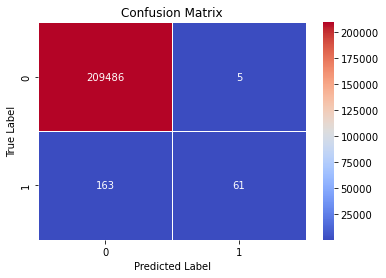


For KNeighborsClassifier, Accuracy score is 0.9995756145244737 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.98      0.62      0.76       224

    accuracy                           1.00    209715
   macro avg       0.99      0.81      0.88    209715
weighted avg       1.00      1.00      1.00    209715



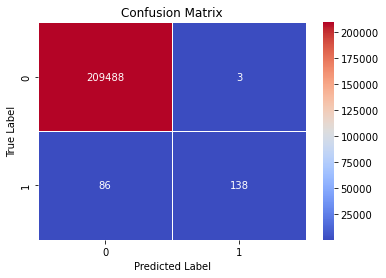


For RandomForestClassifier, Accuracy score is 0.999756812817395 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.94      0.82      0.88       224

    accuracy                           1.00    209715
   macro avg       0.97      0.91      0.94    209715
weighted avg       1.00      1.00      1.00    209715



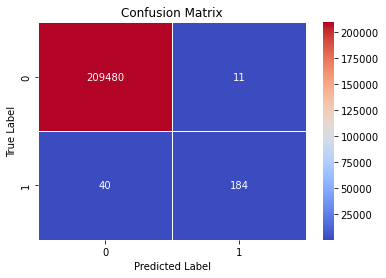


For LinearSVC, Accuracy score is 0.9992084495625015 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.95      0.27      0.42       224

    accuracy                           1.00    209715
   macro avg       0.98      0.64      0.71    209715
weighted avg       1.00      1.00      1.00    209715



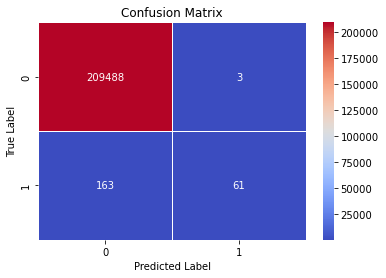

In [56]:
#create function to train a model and evaluate accuracy
def my_train(model,X_train,y_train,X_test,y_test):
    
    #fit your model
    model.fit(X_train,y_train)
    
    #predict on the fitted model
    prediction = model.predict(X_test)
    
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(y_test,prediction))
    plot_confusion_matrix(y_test,prediction)
    confusion_matrix(y_test,prediction,labels=model.classes_)
    ConfusionMatrixDisplay(confusion_matrix,display_labels=model.classes_)

#loop through each model
for model in models:
    my_train(model,X_train,y_train,X_test,y_test)
    

## Evaluation using cross validation

In [57]:
# evaluate your models using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold, cross_val_score


# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)


For LogisticRegression, Accuracy score is 0.9991989128102424 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.92      0.27      0.42       224

    accuracy                           1.00    209715
   macro avg       0.96      0.64      0.71    209715
weighted avg       1.00      1.00      1.00    209715



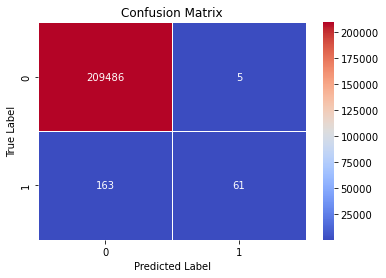


For KNeighborsClassifier, Accuracy score is 0.9995756145244737 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.98      0.62      0.76       224

    accuracy                           1.00    209715
   macro avg       0.99      0.81      0.88    209715
weighted avg       1.00      1.00      1.00    209715



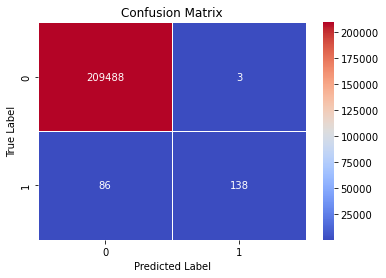


For RandomForestClassifier, Accuracy score is 0.9997615811935245 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.95      0.82      0.88       224

    accuracy                           1.00    209715
   macro avg       0.97      0.91      0.94    209715
weighted avg       1.00      1.00      1.00    209715



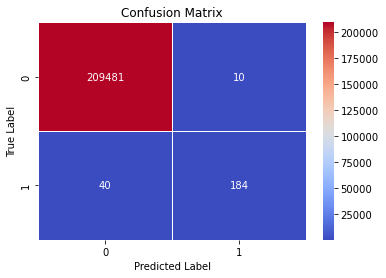


For LinearSVC, Accuracy score is 0.9992084495625015 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.95      0.27      0.42       224

    accuracy                           1.00    209715
   macro avg       0.98      0.64      0.71    209715
weighted avg       1.00      1.00      1.00    209715



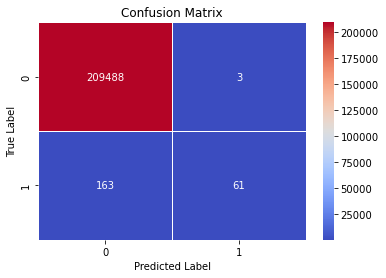

In [58]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model,X,y):
    '''Cross validation function. Expects a model,'''
    
    score = ['accuracy', 'precision', 'recall']
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=score, cv=cv, n_jobs=-1)
    
    # report performance
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,mean(scores)))
    print(classification_report(y_test,prediction))
    plot_confusion_matrix(y_test,prediction)
    
#loop through each model
for model in models:
    my_train(model,X_train,y_train,X_test,y_test)

## Interpretation of results

- The **accuracy** scores are high but that does not imply that our models are the best and this is because our target class(fraud) is not symmetric; not balanced. For this model, our accuracy scores are 0.9991, 0.9995, 0.9997, 0.9992 so approximately our models are approximately 90% accurate.
- **Precision** is the ratio of correctly predicted observations to the total predicted positive observation. So, the question here is that of all the transactions labbelled fraudulent, how many were actually fraudulent? 
- **Recall** examines the the ratio of correctly predicted observations to all observations in actual class. So, our question is, of all the transactions that were frauds, how many did our model label? 
- F1 takes both false positives and false negatives into account.

In this project,  we will be choosing the model with the highest recall because we want a model that can rightly label fraudulent transactions and help Blossom Bank to keep such transactions in check. 
Hence, we will be choosing the **Random Forest model**. 